<a href="https://colab.research.google.com/github/vachan-rajeev/blaugrana/blob/main/ML%20Project%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Load the file
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name, header=1)
df.rename(columns={'default payment next month': 'default'}, inplace=True)

print("✅ File loaded successfully.\n")

print("🧾 Dataset Dimensions (rows, columns):", df.shape)
print("\n📌 First 5 rows of data:")
print(df.head())

print("\n🔍 Dataset Information:")
print(df.info())


🧾 Dataset Dimensions (rows, columns): (30000, 25)

📌 First 5 rows of data:
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4

In [ ]:
df.drop(columns='ID', inplace=True)
print("✅ Dropped 'ID' column.\n")


✅ Dropped 'ID' column.



In [ ]:
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"🧹 Removed {before - after} duplicate rows.")


🧹 Removed 35 duplicate rows.


In [ ]:
print("🎓 EDUCATION value counts (before cleaning):")
print(df['EDUCATION'].value_counts())

print("\n💍 MARRIAGE value counts (before cleaning):")
print(df['MARRIAGE'].value_counts())

# Replace invalid values
df['EDUCATION'] = df['EDUCATION'].replace({0: 4, 5: 4, 6: 4})
df['MARRIAGE'] = df['MARRIAGE'].replace({0: 3})

print("\n✅ Fixed anomalous values in EDUCATION and MARRIAGE.")

print("\n🎓 EDUCATION value counts (after cleaning):")
print(df['EDUCATION'].value_counts())

print("\n💍 MARRIAGE value counts (after cleaning):")
print(df['MARRIAGE'].value_counts())


🎓 EDUCATION value counts (before cleaning):
EDUCATION
2    14019
1    10563
3     4915
5      280
4      123
6       51
0       14
Name: count, dtype: int64

💍 MARRIAGE value counts (before cleaning):
MARRIAGE
2    15945
1    13643
3      323
0       54
Name: count, dtype: int64

✅ Fixed anomalous values in EDUCATION and MARRIAGE.

🎓 EDUCATION value counts (after cleaning):
EDUCATION
2    14019
1    10563
3     4915
4      468
Name: count, dtype: int64

💍 MARRIAGE value counts (after cleaning):
MARRIAGE
2    15945
1    13643
3      377
Name: count, dtype: int64


In [ ]:
print("🔎 Missing values in each column:")
print(df.isnull().sum())


🔎 Missing values in each column:
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64


In [ ]:
df.to_csv('cleaned_credit_card_data.csv', index=False)
files.download('cleaned_credit_card_data.csv')
print("📁 Cleaned dataset saved and ready for download.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 Cleaned dataset saved and ready for download.


In [ ]:
print("📈 Descriptive Statistics:")
print(df.describe())


📈 Descriptive Statistics:
            LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    29965.000000  29965.000000  29965.000000  29965.000000  29965.000000   
mean    167442.005006      1.603738      1.842750      1.557283     35.487969   
std     129760.135222      0.489128      0.744513      0.521431      9.219459   
min      10000.000000      1.000000      1.000000      1.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      4.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  29965.000000  29965.000000  29965.000000  29965.000000  29965.000000   
mean      -0.016753     -0.131854     -0.164392     -0.218922     -0.264509   
std    

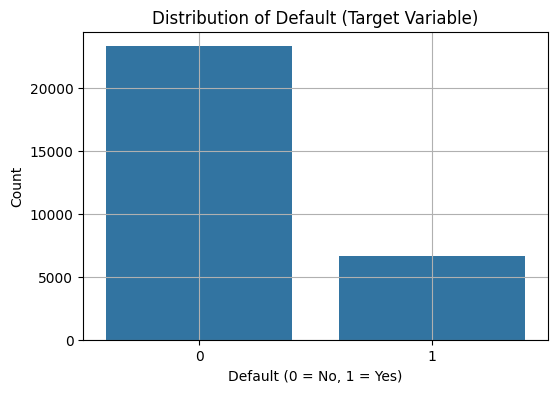

default
0    23335
1     6630
Name: count, dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='default', data=df)
plt.title("Distribution of Default (Target Variable)")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

print(df['default'].value_counts())


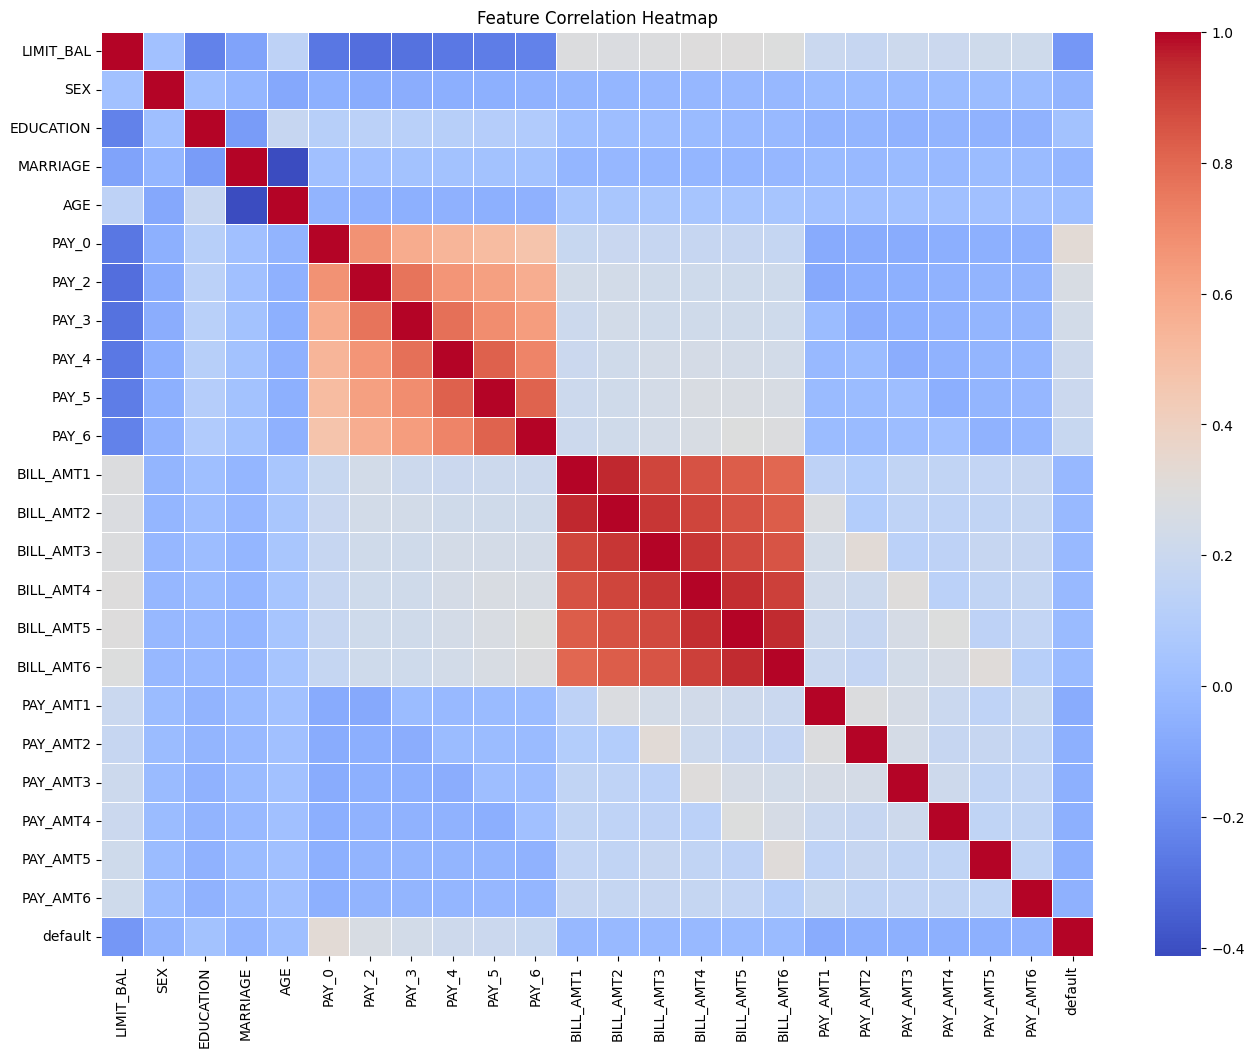

In [ ]:
plt.figure(figsize=(16,12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5, annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


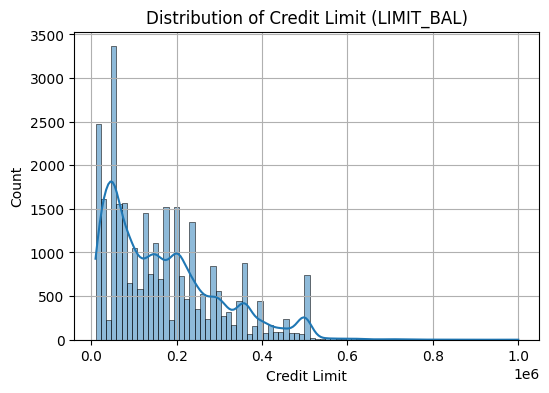

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['LIMIT_BAL'], kde=True)
plt.title("Distribution of Credit Limit (LIMIT_BAL)")
plt.xlabel("Credit Limit")
plt.grid(True)
plt.show()


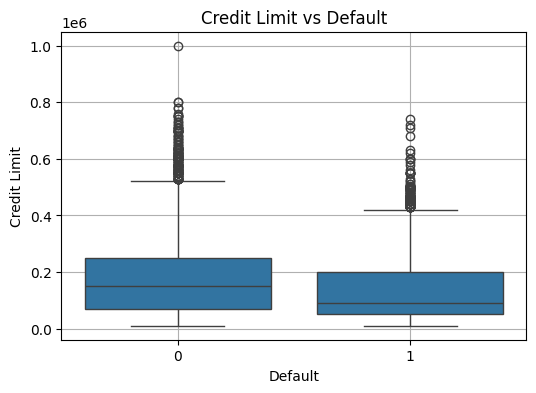

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='default', y='LIMIT_BAL', data=df)
plt.title("Credit Limit vs Default")
plt.xlabel("Default")
plt.ylabel("Credit Limit")
plt.grid(True)
plt.show()


In [ ]:
print("📊 Average values grouped by default status:")
print(df.groupby('default').mean())


📊 Average values grouped by default status:
             LIMIT_BAL       SEX  EDUCATION  MARRIAGE        AGE     PAY_0  \
default                                                                      
0        178084.508249  1.614099   1.829312  1.564860  35.421041 -0.211356   
1        129984.567119  1.567270   1.890045  1.530618  35.723529  0.668175   

            PAY_2     PAY_3     PAY_4     PAY_5  ...     BILL_AMT3  \
default                                          ...                 
0       -0.299979 -0.314335 -0.353760 -0.387658  ...  47592.314763   
1        0.459879  0.363348  0.255656  0.168929  ...  45222.238311   

            BILL_AMT4     BILL_AMT5     BILL_AMT6     PAY_AMT1     PAY_AMT2  \
default                                                                       
0        43665.240026  40580.691493  39090.665395  6315.052111  6648.593829   
1        42074.744193  39575.724585  38305.821418  3400.118401  3391.716290   

            PAY_AMT3     PAY_AMT4     PAY_AMT

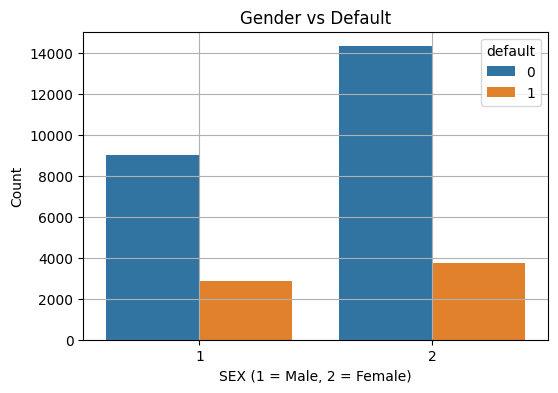

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='SEX', hue='default', data=df)
plt.title("Gender vs Default")
plt.xlabel("SEX (1 = Male, 2 = Female)")
plt.ylabel("Count")
plt.grid(True)
plt.show()


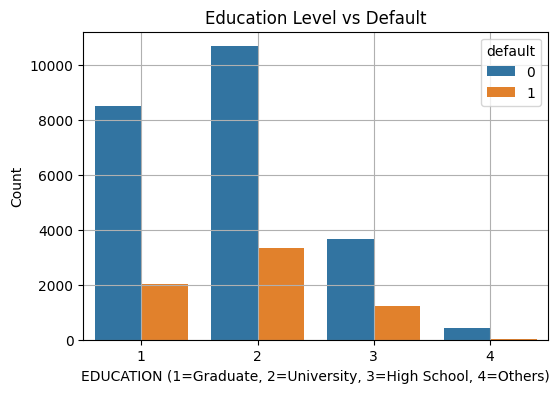

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='EDUCATION', hue='default', data=df)
plt.title("Education Level vs Default")
plt.xlabel("EDUCATION (1=Graduate, 2=University, 3=High School, 4=Others)")
plt.ylabel("Count")
plt.grid(True)
plt.show()


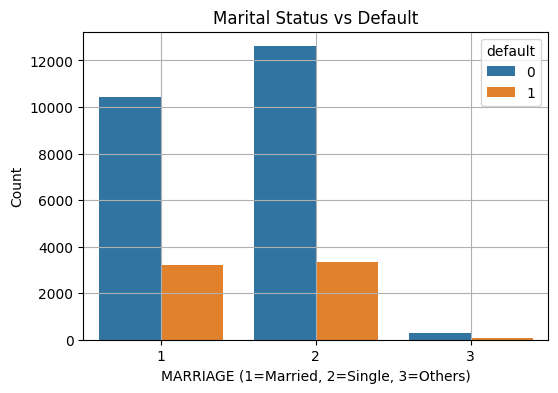

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='MARRIAGE', hue='default', data=df)
plt.title("Marital Status vs Default")
plt.xlabel("MARRIAGE (1=Married, 2=Single, 3=Others)")
plt.ylabel("Count")
plt.grid(True)
plt.show()


In [ ]:
print("SEX vs Default:")
print(pd.crosstab(df['SEX'], df['default'], normalize='index') * 100)

print("\nEDUCATION vs Default:")
print(pd.crosstab(df['EDUCATION'], df['default'], normalize='index') * 100)

print("\nMARRIAGE vs Default:")
print(pd.crosstab(df['MARRIAGE'], df['default'], normalize='index') * 100)


SEX vs Default:
default          0          1
SEX                          
1        75.837965  24.162035
2        79.210657  20.789343

EDUCATION vs Default:
default            0          1
EDUCATION                      
1          80.763041  19.236959
2          76.260789  23.739211
3          74.832146  25.167854
4          92.948718   7.051282

MARRIAGE vs Default:
default           0          1
MARRIAGE                      
1         76.537418  23.462582
2         79.052995  20.947005
3         76.392573  23.607427


🔽 Installing xgboost…
✅ xgboost installed.

🔽 Importing libraries…
✅ Libraries imported.

🔽 Uploading cleaned_credit_card_data.csv…


Saving cleaned_credit_card_data.csv to cleaned_credit_card_data.csv
✅ Uploaded file: cleaned_credit_card_data.csv
✅ Data loaded. Shape: (29965, 24)

🔽 Plotting default distribution…


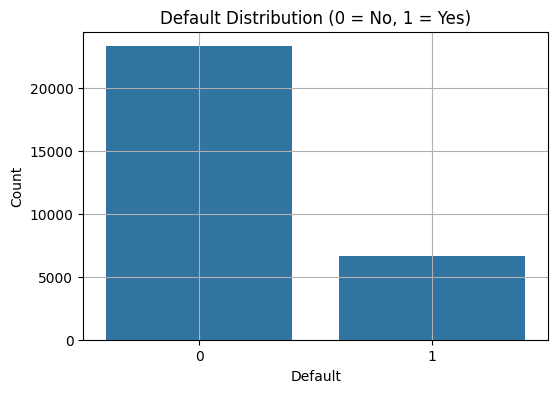

🔽 Preparing features and target…
Features: (29965, 23), Target length: 29965

🔽 Splitting into train/test and scaling features…
Train: (23972, 23), Test: (5993, 23)

🔹 Training Logistic Regression…
🔹 Training XGBoost…


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:10:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔹 Training SVM…
✅ All models trained.

🔽 Plotting ROC curves…


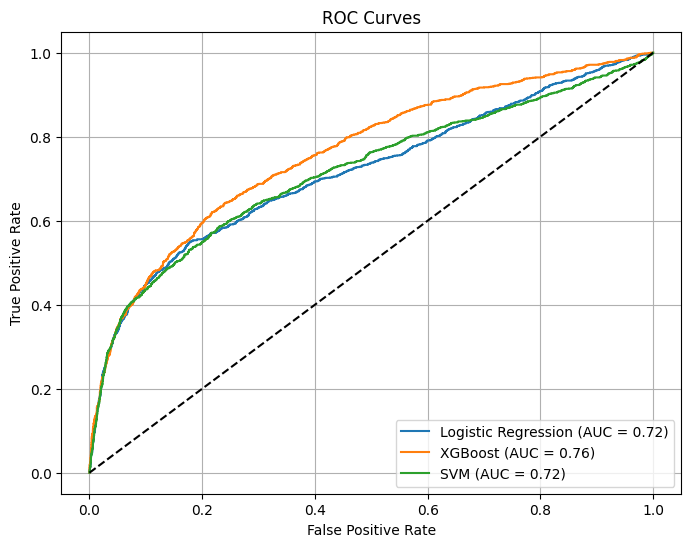

🔽 Plotting confusion matrices…


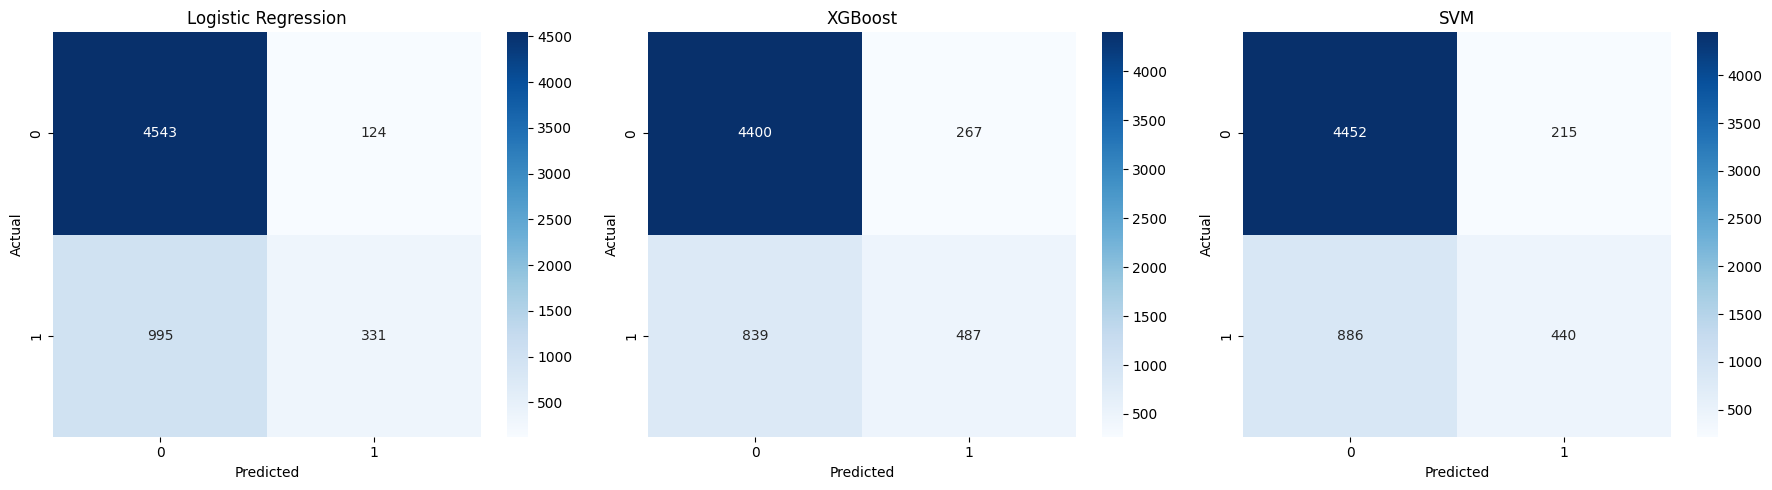

🔽 Plotting XGBoost feature importances…


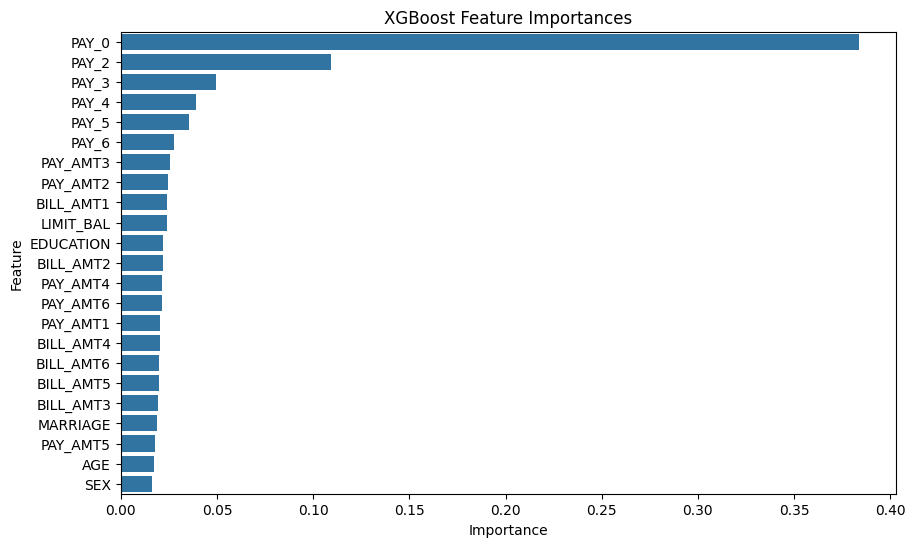

🔽 Plotting Logistic Regression coefficients…


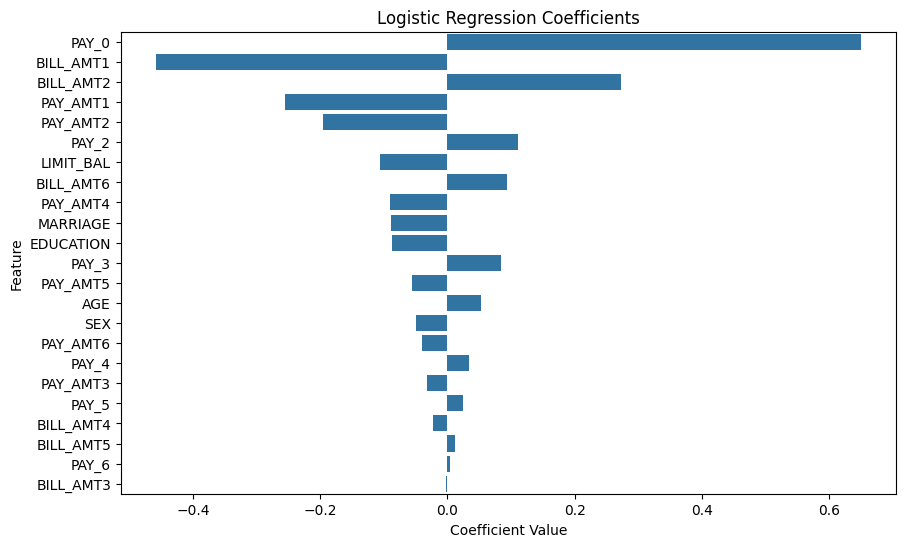

✅ Visual analysis complete!


In [1]:
# 1. Install any missing libraries (run once)
print("🔽 Installing xgboost…")
!pip install xgboost --quiet
print("✅ xgboost installed.\n")

# 2. Imports
print("🔽 Importing libraries…")
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report, accuracy_score,
    confusion_matrix, roc_curve, auc
)
print("✅ Libraries imported.\n")

# 3. Upload and load your cleaned CSV
print("🔽 Uploading cleaned_credit_card_data.csv…")
uploaded = files.upload()  # choose your cleaned CSV
file_name = list(uploaded.keys())[0]
print(f"✅ Uploaded file: {file_name}")
df = pd.read_csv(file_name)
print(f"✅ Data loaded. Shape: {df.shape}\n")

# 4. Quick EDA: target distribution
print("🔽 Plotting default distribution…")
plt.figure(figsize=(6,4))
sns.countplot(x='default', data=df)
plt.title("Default Distribution (0 = No, 1 = Yes)")
plt.xlabel("Default")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# 5. Prepare features and target
print("🔽 Preparing features and target…")
X = df.drop('default', axis=1)
y = df['default']
print(f"Features: {X.shape}, Target length: {len(y)}\n")

# 6. Split and scale
print("🔽 Splitting into train/test and scaling features…")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
print(f"Train: {X_train.shape}, Test: {X_test.shape}\n")

# 7. Train models
print("🔹 Training Logistic Regression…")
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

print("🔹 Training XGBoost…")
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

print("🔹 Training SVM…")
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

print("✅ All models trained.\n")

# 8. Evaluate & plot ROC curves
print("🔽 Plotting ROC curves…")
plt.figure(figsize=(8,6))
for name, model, Xdata in [
    ('Logistic Regression', lr, X_test_scaled),
    ('XGBoost', xgb, X_test.values),
    ('SVM', svm, X_test_scaled)
]:
    probs = model.predict_proba(Xdata)[:,1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0,1],[0,1],'k--')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 9. Confusion matrices
print("🔽 Plotting confusion matrices…")
fig, axes = plt.subplots(1, 3, figsize=(18,5))
for ax, (name, model, Xdata) in zip(axes, [
    ('Logistic Regression', lr, X_test_scaled),
    ('XGBoost', xgb, X_test.values),
    ('SVM', svm, X_test_scaled),
]):
    y_pred = model.predict(Xdata)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# 10. Feature importance (XGBoost) & coefficients (LR)
import numpy as np

# XGBoost feature importances
print("🔽 Plotting XGBoost feature importances…")
imp = xgb.feature_importances_
idx = np.argsort(imp)[::-1]
plt.figure(figsize=(10,6))
sns.barplot(x=imp[idx], y=X.columns[idx], orient='h')
plt.title('XGBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Logistic Regression coefficients
print("🔽 Plotting Logistic Regression coefficients…")
coef = lr.coef_[0]
idx_lr = np.argsort(np.abs(coef))[::-1]
plt.figure(figsize=(10,6))
sns.barplot(x=coef[idx_lr], y=X.columns[idx_lr], orient='h')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

print("✅ Visual analysis complete!")
